# 1. Data preprocessing and exploration

## 1.1. Importing libraries and dataset

In [1]:

# bib pour la manipulation de la base de connaissances (Churn_Modelling.csv)
import pandas as pd

# bib pour l'utilisation des vecteurs et des matrices (tout ce qui est calcul scientifique)
import numpy as np

#bib pour la visualisation des courbes (matplotlib) en 2D (pyplot)
import matplotlib.pyplot as plt

# bib pour visualiser et manipuler les outils statistiques
import seaborn as sns

#bib pour ignorer les affiches d'alertes rouges (warnings)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# lire le fichier de la base de connaissances
dataset = pd.read_csv('KaggleV2-May-2016.csv')


In [3]:
# lire les cinq pemières lignes de la base de connaissances
dataset.head(5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
#lire la taille de la base de connaissances
dataset.shape

(110527, 14)

#

In [5]:
dataset['ScheduledDay'] = pd.to_datetime(dataset['ScheduledDay']).dt.strftime('%Y-%m-%d')
dataset['ScheduledDay'] = pd.to_datetime(dataset['ScheduledDay'])
dataset['ScheduledDay']

0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
            ...    
110522   2016-05-03
110523   2016-05-03
110524   2016-04-27
110525   2016-04-27
110526   2016-04-27
Name: ScheduledDay, Length: 110527, dtype: datetime64[ns]

In [6]:
#dataset['Num_App_Missed'] = dataset.groupby('PatientId')['No-show'].apply(lambda x: x.cumsum())
#dataset['Num_App_Missed']

In [7]:
dataset['AppointmentDay'] = pd.to_datetime(dataset['AppointmentDay']).dt.strftime('%Y-%m-%d')
dataset['AppointmentDay'] = pd.to_datetime(dataset['AppointmentDay'])
dataset['AppointmentDay']

0        2016-04-29
1        2016-04-29
2        2016-04-29
3        2016-04-29
4        2016-04-29
            ...    
110522   2016-06-07
110523   2016-06-07
110524   2016-06-07
110525   2016-06-07
110526   2016-06-07
Name: AppointmentDay, Length: 110527, dtype: datetime64[ns]

In [8]:
dataset['Day_diff'] = (dataset['AppointmentDay'] - dataset['ScheduledDay']).dt.days
dataset['Day_diff'].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123], dtype=int64)

In [9]:
dataset.drop(['ScheduledDay'], axis=1, inplace=True)
dataset.drop(['AppointmentDay'], axis=1, inplace=True)
dataset.drop('PatientId', axis=1,inplace = True)
#dataset.drop('Neighbourhood', axis=1,inplace = True)

In [10]:
#Convert to Categorical
dataset['Handcap'] = pd.Categorical(dataset['Handcap'])
#Convert to Dummy Variables
Handicap = pd.get_dummies(dataset['Handcap'], prefix = 'Handicap')
dataset = pd.concat([dataset, Handicap], axis=1)
dataset.drop(['Handcap'], axis=1, inplace = True)

In [11]:
dataset.head(50)

,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,Day_diff,Handicap_0,Handicap_1,Handicap_2,Handicap_3,Handicap_4
0,5642903,F,62,JARDIM DA PENHA,0,1,0,0,0,No,0,1,0,0,0,0
1,5642503,M,56,JARDIM DA PENHA,0,0,0,0,0,No,0,1,0,0,0,0
2,5642549,F,62,MATA DA PRAIA,0,0,0,0,0,No,0,1,0,0,0,0
3,5642828,F,8,PONTAL DE CAMBURI,0,0,0,0,0,No,0,1,0,0,0,0
4,5642494,F,56,JARDIM DA PENHA,0,1,1,0,0,No,0,1,0,0,0,0
5,5626772,F,76,REPÚBLICA,0,1,0,0,0,No,2,1,0,0,0,0
6,5630279,F,23,GOIABEIRAS,0,0,0,0,0,Yes,2,1,0,0,0,0
7,5630575,F,39,GOIABEIRAS,0,0,0,0,0,Yes,2,1,0,0,0,0
8,5638447,F,21,ANDORINHAS,0,0,0,0,0,No,0,1,0,0,0,0
9,5629123,F,19,CONQUISTA,0,0,0,0,0,No,2,1,0,0,0,0


## 1.2. Statistical description


In [12]:
# vérifier s'il y a des valeurs manquantes
dataset.isnull().sum()

AppointmentID    0
Gender           0
Age              0
Neighbourhood    0
Scholarship      0
Hipertension     0
Diabetes         0
Alcoholism       0
SMS_received     0
No-show          0
Day_diff         0
Handicap_0       0
Handicap_1       0
Handicap_2       0
Handicap_3       0
Handicap_4       0
dtype: int64

In [13]:
#vérifier les différentes information descriptives 'colonnes' ainsi que leur type
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   AppointmentID  110527 non-null  int64 
 1   Gender         110527 non-null  object
 2   Age            110527 non-null  int64 
 3   Neighbourhood  110527 non-null  object
 4   Scholarship    110527 non-null  int64 
 5   Hipertension   110527 non-null  int64 
 6   Diabetes       110527 non-null  int64 
 7   Alcoholism     110527 non-null  int64 
 8   SMS_received   110527 non-null  int64 
 9   No-show        110527 non-null  object
 10  Day_diff       110527 non-null  int64 
 11  Handicap_0     110527 non-null  uint8 
 12  Handicap_1     110527 non-null  uint8 
 13  Handicap_2     110527 non-null  uint8 
 14  Handicap_3     110527 non-null  uint8 
 15  Handicap_4     110527 non-null  uint8 
dtypes: int64(8), object(3), uint8(5)
memory usage: 9.8+ MB


In [14]:
#description détaillée de la base de connaissance (que les colonnes de type Numérique)
dataset.describe()
#Remarque : std signifie l'écart type qui est la racine carrée de la variance

,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,Day_diff,Handicap_0,Handicap_1,Handicap_2,Handicap_3,Handicap_4
count,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.321026,10.183702,0.979724,0.018475,0.001656,0.000118,0.000027
std,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.466873,15.254996,0.140942,0.134662,0.040657,0.010845,0.005210
min,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000
75%,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,1.000000,15.000000,1.000000,0.000000,0.000000,0.000000,0.000000
max,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
#description détaillée de la base de connaissance (que les colonnes de type object (chaînes de caractéres))
# unique : nombre de noms qui se répétent, nombre de Neighbourhood qui se répétent (SÃO CRISTÓVÃO, MARUÍPE, GRANDE VITÓRIA) et nombre de genre (male, femelle)
# top : nom qui se répéte fréquement
dataset.describe(include=['object'])

,Gender,Neighbourhood,No-show
count,110527,110527,110527
unique,2,81,2
top,F,JARDIM CAMBURI,No
freq,71840,7717,88208


In [16]:
# pour le type gender: quels sont les pays qui existent dans la base ?
dataset['Gender'].unique()

array(['F', 'M'], dtype=object)

In [17]:
# pour le type day_diff : combien on a des day_diff
dataset['Day_diff'].unique()

array([  0,   2,   3,   1,   4,   9,  29,  10,  23,  11,  18,  17,  14,
        28,  24,  21,  15,  16,  22,  43,  30,  31,  42,  32,  56,  45,
        46,  39,  37,  38,  44,  50,  60,  52,  53,  65,  67,  91,  66,
        84,  78,  87, 115, 109,  63,  70,  72,  57,  58,  51,  59,  41,
        49,  73,  64,  20,  33,  34,   6,  35,  36,  12,  13,  40,  47,
         8,   5,   7,  25,  26,  48,  27,  19,  61,  55,  62, 176,  54,
        77,  69,  83,  76,  89,  81, 103,  79,  68,  75,  85, 112,  -1,
        80,  86,  98,  94, 142, 155, 162, 169, 104, 133, 125,  96,  88,
        90, 151, 126, 127, 111, 119,  74,  71,  82, 108, 110, 102, 122,
       101, 105,  92,  97,  93, 107,  95,  -6, 139, 132, 179, 117, 146,
       123], dtype=int64)

In [18]:
dataset['Diabetes'].value_counts()

0    102584
1      7943
Name: Diabetes, dtype: int64

In [19]:
dataset['Gender'] = dataset['Gender'].map({'F': 0, 'M':1})
dataset['No-show'] = dataset['No-show'].map({'No': 0,'Yes':1})
dataset.sample(3)

,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,Day_diff,Handicap_0,Handicap_1,Handicap_2,Handicap_3,Handicap_4
21537,5682544,0,54,SANTO ANTÔNIO,0,0,0,0,0,0,6,1,0,0,0,0
17412,5722009,1,8,SANTO ANDRÉ,0,0,0,0,0,1,10,1,0,0,0,0
14157,5696922,1,52,MARIA ORTIZ,0,0,0,0,0,1,6,1,0,0,0,0


In [20]:
dataset.sample(3)

,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,Day_diff,Handicap_0,Handicap_1,Handicap_2,Handicap_3,Handicap_4
22683,5679096,0,42,SÃO BENEDITO,0,0,0,0,0,0,0,1,0,0,0,0
16760,5754027,0,39,SANTA MARTHA,0,1,0,0,0,0,0,1,0,0,0,0
74196,5637066,0,0,SÃO PEDRO,0,0,0,0,0,0,21,1,0,0,0,0


In [21]:
#afficher le nombre de passion que sont arriver ou bien rater ses rendez-vous 
dataset['No-show'].value_counts()

0    88208
1    22319
Name: No-show, dtype: int64

## 1.3. Boxplot : 
l'objectif est de savoir parquoi on va remplacer nos valeurs 'numériques' manquantes (moyenne ou médiane) 

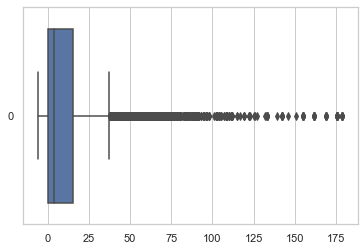

In [22]:
#Boxplot représente l'inervalle de confience
# fond du plan de la courbe
sns.set(style='whitegrid')
#le Boxplot de la colonne 'Day_diff' qui sera affiché horizentallement 'h' (ou verticale 'v')
ax = sns.boxplot(data = dataset['Day_diff'], orient = 'h')

In [23]:
#calcul de IQR 
IQR = dataset['Day_diff'].quantile(0.75)-dataset['Day_diff'].quantile(0.5)
print (IQR)

11.0


In [24]:
#Caclcul de la borne inférieur (min)
Inf = dataset['Day_diff'].quantile(0.25)-1.5*IQR
print (Inf)

-16.5


In [25]:
# on veux représenter les clients qui ont un créditScore < 383, càd qui représentent les outlayers 
dataset[dataset['Day_diff']>Inf]

,AppointmentID,Gender,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,Day_diff,Handicap_0,Handicap_1,Handicap_2,Handicap_3,Handicap_4
0,5642903,0,62,JARDIM DA PENHA,0,1,0,0,0,0,0,1,0,0,0,0
1,5642503,1,56,JARDIM DA PENHA,0,0,0,0,0,0,0,1,0,0,0,0
2,5642549,0,62,MATA DA PRAIA,0,0,0,0,0,0,0,1,0,0,0,0
3,5642828,0,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,1,0,0,0,0
4,5642494,0,56,JARDIM DA PENHA,0,1,1,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110522,5651768,0,56,MARIA ORTIZ,0,0,0,0,1,0,35,1,0,0,0,0
110523,5650093,0,51,MARIA ORTIZ,0,0,0,0,1,0,35,1,0,0,0,0
110524,5630692,0,21,MARIA ORTIZ,0,0,0,0,1,0,41,1,0,0,0,0
110525,5630323,0,38,MARIA ORTIZ,0,0,0,0,1,0,41,1,0,0,0,0


In [26]:
#si on veux maintenant compter les clients qui appartient aux outlayers 
dataset[dataset['Day_diff']<Inf].count()

AppointmentID    0
Gender           0
Age              0
Neighbourhood    0
Scholarship      0
Hipertension     0
Diabetes         0
Alcoholism       0
SMS_received     0
No-show          0
Day_diff         0
Handicap_0       0
Handicap_1       0
Handicap_2       0
Handicap_3       0
Handicap_4       0
dtype: int64

In [27]:
#Caclcul de la borne supérieur (max)
Sup = dataset['Day_diff'].quantile(0.63)+1.5*IQR
print (Sup)

23.5


In [28]:
# on veux mnt afficher 2 boxplots

In [29]:
#on veux créer une liste qui ne contiendra que deux variables 'Day_diff' et'age'
my_list = ['Day_diff', 'Age']
my_list

['Day_diff', 'Age']

In [30]:
#afficher le conteu de la base en fonction des variables de la liste
dataset[my_list].head()

,Day_diff,Age
0,0,62
1,0,56
2,0,62
3,0,8
4,0,56


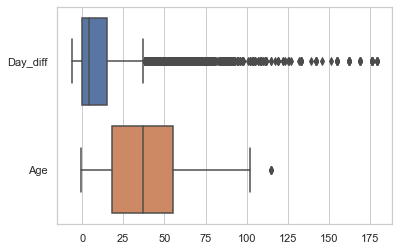

In [31]:
#afficuer le boxplot des deux colonnes 'day_diff' et 'age' au même temps
ax = sns.boxplot(data = dataset[my_list], orient = 'h')

In [32]:
# on génére les boxplots pour remplacer les valeurs numériques manquantes
# bornes [inf..sup] représentent l'intervalle de confiance

     # si : il n'existent pas des outlayers --> on remplace les valeurs manquantes par la moyenne
     # si : il exite des outlayers --> on remplace les valeurs manquantes par la médiane(50% du tableaux trié sachant que le tableau est organisé comme suit: [25% - 50% - 75%]) 

## 1.4. Scatter Plot : 
permet de représenter, s'il y a, la relation entre deux variables (ex: age-CreditScore) pour dégager le modéle (linéaire, exponentielle...) qui les relient ou même éparpillé càd pas de relation entre les deux variables

In [ ]:
#toutes les combinaisons des variables (columns) possibles
sns.set(style='ticks')
sns.pairplot(dataset)

#par exemple : pour les variables où on a une ligne en dehaut et une autre en bas représentent des valeurs booléannes 0 ou 1.

## 1.5. Input variables and target : 
iloc. permet la LOCALISATION dun INDICE dune information dans la base

In [33]:
dataset.drop('Neighbourhood', axis=1,inplace = True)

In [34]:
    #axe des colonnes : les variables qui vont intervenir comme des Features [Position 1 jusqu'à 16]
X = dataset.iloc[:,1:16] # veux dire toutes les lignes et les colonnes de [3 à 13-1]

#axe des lignes : Variable cible dont la position est 8 [NoShow]
y = dataset.iloc[:,8] # veux dire toutes les lignes et la colonne 8

In [35]:
#afficher l'axe des X uniquement (variables = [1..16])
X.head()


,Gender,Age,Scholarship,Hipertension,Diabetes,Alcoholism,SMS_received,No-show,Day_diff,Handicap_0,Handicap_1,Handicap_2,Handicap_3,Handicap_4
0,0,62,0,1,0,0,0,0,0,1,0,0,0,0
1,1,56,0,0,0,0,0,0,0,1,0,0,0,0
2,0,62,0,0,0,0,0,0,0,1,0,0,0,0
3,0,8,0,0,0,0,0,0,0,1,0,0,0,0
4,0,56,0,1,1,0,0,0,0,1,0,0,0,0


In [36]:
#afficher l'axe des Y iniquement (variable cible [8]=[NOShow])
y.head()

0    0
1    0
2    0
3    0
4    0
Name: No-show, dtype: int64

In [37]:
#l'axe des X est une table de donées (DataFrame) : qui représentent les Features ont fonction des quels ont va générer le model
type(X)

pandas.core.frame.DataFrame

In [38]:
#l'axe des y est une série de données [0-1-0-1...] : Y représente la cible à prédire [variable : Existed]
type(y)

pandas.core.series.Series

**Convert DataFrame to Numpy Array**

In [39]:
#on veux mnt convertir le DataFrame en une matrice
X = X.values
#Y représentent des valeurs en Pandas.serie de la cible [NOshow]
y = y.values

In [40]:
# X a été convertie d'une DataFrame à une Matrice.Numpy
type(X)

numpy.ndarray

In [41]:
# Y restera une série
type(y)

numpy.ndarray

In [42]:
#Reprénte la matrice des Features (5 premières lignes pour toutes les colonnes)
X[0:6,:]

array([[ 0, 62,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1, 56,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 62,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 56,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 76,  0,  1,  0,  0,  0,  0,  2,  1,  0,  0,  0,  0]],
      dtype=int64)

In [43]:
X.shape

(110527, 14)

## 1.6. Encoding categorical data : (we didn't use)
cela vise à convertir les valeurs de type chaîne de caractéres en des valeurs numérique parceque les models satistiques ne comprennent pas les valeurs str

In [44]:
# convertir les variables de type chaîne de caractéres en des variables numériques (en se basant sur l'orde alphabétique)
# femelle va prendre la valeur 0 (car f) et male va prendre la valeur 1 (car m)

# sklearn = bibliohèque
# .preprocessing = module qui appartien à la bibliothéque
# LabelEncoder = classe (fonctionnalité du module .preprocessing)
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

In [45]:
# Ajuster et transformer toutes les lignes de la colonne 1 (géographie) : donc France -> 0, Germany -> 1, Spain -> 2
X[:,3] = label.fit_transform(X[:,3])

# Ajuster et transformer toutes les lignes de la colonne 2 (sexe) : donc Femelle -> 0, male -> 1
#X[:,2] = label.fit_transform(X[:,2])

In [46]:
#en fesant parcourir la matrice ajustées : 
X[0:10,:]

array([[ 0, 62,  0,  1,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 1, 56,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 62,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0,  8,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 56,  0,  1,  1,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 76,  0,  1,  0,  0,  0,  0,  2,  1,  0,  0,  0,  0],
       [ 0, 23,  0,  0,  0,  0,  0,  1,  2,  1,  0,  0,  0,  0],
       [ 0, 39,  0,  0,  0,  0,  0,  1,  2,  1,  0,  0,  0,  0],
       [ 0, 21,  0,  0,  0,  0,  0,  0,  0,  1,  0,  0,  0,  0],
       [ 0, 19,  0,  0,  0,  0,  0,  0,  2,  1,  0,  0,  0,  0]],
      dtype=int64)

# Remarque : 
   ##### Lorsqu'on a attribué 0->male et 1-> femelle cela veux dire que PoidsMale << PoidsFemelle ; => problématique
# Solution : 
  #####  en passe à ce qu'on appelle 'Dummy encoding'

In [47]:
#bib qui permet d'encoder une variable à n états sur n bits 
from sklearn.preprocessing import OneHotEncoder
#bib qui permet d'appliquer des transformateurs aux colonnes d'un tableau
from sklearn.compose import ColumnTransformer

In [48]:
# résultat générée ici doit être (10000,10) (sauf si j'ai déja exécuté la ligne qui suit)
#donc x.shape ici c'est avant l'éclatement de la colonne (geography)
X.shape

(110527, 14)

In [49]:
# on veux transformer la colonne 'gender' ayant comme indice [1]
# on ajoute la ligne remainder='passthrough' pour qu'il n'oublie pas d'ajouter les autres colonnes qui suivent la colonne 'Géography'
ct = ColumnTransformer([('Gender',OneHotEncoder(),[4])],\
                         remainder = 'passthrough')

In [50]:
X = ct.fit_transform(X)

In [51]:
X.shape

(110527, 15)

In [52]:
X[0:10,:]

array([[ 1.,  0.,  0., 62.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.],
       [ 1.,  0.,  1., 56.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.],
       [ 1.,  0.,  0., 62.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.],
       [ 1.,  0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.],
       [ 0.,  1.,  0., 56.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.],
       [ 1.,  0.,  0., 76.,  0.,  1.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,
         0.,  0.],
       [ 1.,  0.,  0., 23.,  0.,  0.,  0.,  0.,  1.,  2.,  1.,  0.,  0.,
         0.,  0.],
       [ 1.,  0.,  0., 39.,  0.,  0.,  0.,  0.,  1.,  2.,  1.,  0.,  0.,
         0.,  0.],
       [ 1.,  0.,  0., 21.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         0.,  0.],
       [ 1.,  0.,  0., 19.,  0.,  0.,  0.,  0.,  0.,  2.,  1.,  0.,  0.,
         0.,  0.]])

In [53]:
#on élimine donc la colonne une ayant comme indice [0]
# on affiche alors toutes les lignes - et les colonnes a partir de [1:]
X = X[:,1:]

In [54]:
#après élimination de la colonne 1 , shape de colonnes devient 11
X.shape

(110527, 14)

In [55]:
#afficher les 5 premieres lignes et les 11 colonnes
X[0:5,:]

array([[ 0.,  0., 62.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.],
       [ 0.,  1., 56.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.],
       [ 0.,  0., 62.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.],
       [ 0.,  0.,  8.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.],
       [ 1.,  0., 56.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
         0.]])

In [56]:
# afficher les noms des colonnes initiales
dataset.columns

Index(['AppointmentID', 'Gender', 'Age', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'SMS_received', 'No-show', 'Day_diff',
       'Handicap_0', 'Handicap_1', 'Handicap_2', 'Handicap_3', 'Handicap_4'],
      dtype='object')

In [57]:
#attribuer des features aux noms des colonnes après éclattement 
features = ['Gender','Age', 'Neighbourhood', 'Scholarship','Hipertension', 'Diabetes','Alcoholism','SMS_received','Day_diff','Handicap_0','Handicap_1','Handicap_2','Handicap_3','Handicap_4']

In [58]:
#après le preprocessing qu'on a exécuté , l'ordre des Features a devenu comme ça : 
features

['Gender',
 'Age',
 'Neighbourhood',
 'Scholarship',
 'Hipertension',
 'Diabetes',
 'Alcoholism',
 'SMS_received',
 'Day_diff',
 'Handicap_0',
 'Handicap_1',
 'Handicap_2',
 'Handicap_3',
 'Handicap_4']

## 1.7. Splitting dataset into train and test sets : 
diviser les données en des données d'entrainnement et des données de test

In [59]:
#diviser la base de connaissances en deux parties : test et train (avec équilibrage)
# avec la partie train => on va construire notre model en se basnt sur l'un des algorithmes
# on appliquera par la suite ce model sur la partie Test et on compare les résultats de prédiction générée avec celles du test [NoShow]
from sklearn.model_selection import train_test_split

#donner le pourcentage de la base de test 20% (test_size=0.2)
# on fixe randon_state = 0 : pourque la base d'apprentissage et de test ne changent pas au cours de l'exécution. Encore, si on exécute sur une autre machine on obtiendra la même répartition
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,\
                                                random_state=0)

In [60]:
# Taille de la base de train
X_train.shape

(88421, 14)

In [61]:
# taille de la base de test
X_test.shape

(22106, 14)

In [62]:
#moyenne des 0 et de 1 sur toute la base 
y.mean()

0.20193255946510807

In [63]:
#moyenne des 0 et de 1 sur la base d'apprentisage 
print(y_train.mean())

#moyenne des 0 et de 1 sur la base de test 
print(y_test.mean())

0.2028703588514041
0.19818148918845563


# 1.8. Feature scaling : Mise à échelle des features

In [64]:
# Problèmatique : si on utilise la distance euclidienne; une caracrétistique (nombre d'année d'expérience) sera négligéable par rapport (salaire)
# Solution : Normalisation ou la standarisation

In [65]:
#Pour la Standarisation :
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [66]:
#dataset.drop('Num_App_Missed', axis=1,inplace = True)

In [67]:
#standarisation des valeurs de la matrice des features

#fit ici c pour stocker les données dans la RAM
X_train_sc = scaler.fit_transform(X_train)
#X_train_sc = scaler.transform(X_train)

X_test_sc = scaler.transform(X_test)

In [68]:
#Pour la Normalisation :
#from sklearn.preprocessing import MinMaxScaler

In [69]:
#afficher premier ligne sans standarisation
X_train[0,:]

array([ 1.,  0., 48.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,
        0.])

In [70]:
#afficher premier ligne avec standarisation
X_train_sc[0,:]

array([ 3.60640787, -0.73107734,  0.47189885,  3.02574991, -0.49582252,
       -0.17764488, -0.68780052, -0.50448101, -0.66766299,  0.14394882,
       -0.13704287, -0.04149709, -0.01115439, -0.004756  ])

In [71]:
#Exemple de la valeur trouvée 0.16958176 de la 3éme colonne x_train[:,2]
# X = 667
# Means = X_train[:,2].mean()
#écart type = X_train[:,2].std()
(667 - X_train[:,2].mean())/(X_train[:,2].std())

27.27330841723866

# Implimentation des Algorithmes d'apprentissage et L'interface

In [73]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr = LogisticRegression(solver='newton-cg',)
lr.fit(X_train, y_train)
print(lr.score(X_train,y_train))
y_pred_lr = lr.predict(X_test)
clf_report = classification_report(y_test, y_pred_lr)
print(f"Classification Report : \n{clf_report}")

1.0
Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17725
           1       1.00      1.00      1.00      4381

    accuracy                           1.00     22106
   macro avg       1.00      1.00      1.00     22106
weighted avg       1.00      1.00      1.00     22106



In [74]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

clf_report = classification_report(y_test, y_pred_knn)
print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       0.96      1.00      0.98     17725
           1       0.98      0.83      0.90      4381

    accuracy                           0.96     22106
   macro avg       0.97      0.91      0.94     22106
weighted avg       0.96      0.96      0.96     22106



In [75]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)
clf_report = classification_report(y_test, y_pred_dtc)

print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17725
           1       1.00      1.00      1.00      4381

    accuracy                           1.00     22106
   macro avg       1.00      1.00      1.00     22106
weighted avg       1.00      1.00      1.00     22106



In [76]:
from sklearn.ensemble import RandomForestClassifier
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17725
           1       1.00      1.00      1.00      4381

    accuracy                           1.00     22106
   macro avg       1.00      1.00      1.00     22106
weighted avg       1.00      1.00      1.00     22106



In [77]:
from sklearn.ensemble import AdaBoostClassifier
ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

y_pred_ada = ada.predict(X_test)
clf_report = classification_report(y_test, y_pred_ada)

print(f"Classification Report : \n{clf_report}")

Classification Report : 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17725
           1       1.00      1.00      1.00      4381

    accuracy                           1.00     22106
   macro avg       1.00      1.00      1.00     22106
weighted avg       1.00      1.00      1.00     22106



In [79]:
from sklearn.model_selection import cross_val_score

accuracy = cross_val_score(estimator = knn, X = X, y =y, cv = 8)
print("avg acc: ",np.mean(accuracy))
print("acg std: ",np.std(accuracy))


avg acc:  0.9634840515992096
acg std:  0.007401715481515648


In [80]:
def show_stats(df):
    stats = df.describe().T
    header_list = list(stats.columns)
    data = stats.values.tolist()
    for i,d in enumerate(data):
        d.insert(0,list(stats.index)[i])
    header_list=['Feature']+header_list
    layout = [
        [sg.Table(values=data,
                  headings=header_list,
                  font='Helvetica',
                  pad=(10,10),
                  display_row_numbers=False,
                  auto_size_columns=True,
                  num_rows=min(25, len(data)))]
    ]

    window = sg.Window("Statistics", layout, grab_anywhere=False)
    event, values = window.read()
    window.close()

def plot_fig(df):
    """
    Plots
    """
    fig = plt.figure(dpi=100)
    x = list(df.columns)[3]
    y = list(df.columns)[5]
    fig.add_subplot(111).scatter(df[x],df[y], color='blue',edgecolor='k')
    plt.xlabel(x)
    plt.ylabel(y)

    # ------------------------------- END OF YOUR MATPLOTLIB CODE -------------------------------

    # ------------------------------- Beginning of Matplotlib helper code -----------------------

    def draw_figure(canvas, figure):
        figure_canvas_agg = FigureCanvasTkAgg(figure, canvas)
        figure_canvas_agg.draw()
        figure_canvas_agg.get_tk_widget().pack(side='top', fill='both', expand=1)
        return figure_canvas_agg

    # ------------------------------- Beginning of GUI CODE -------------------------------

    # define the window layout
    layout = [[sg.Text('Plot of {} vs. {}'.format(x,y))],
              [sg.Canvas(key='-CANVAS-', 
                         size=(700,500),
                         pad=(15,15))],
              [sg.Button('Ok')]]

    # create the form and show it without the plot
    window = sg.Window('Plot', 
                       layout,
                       size=(800,600),
                       finalize=True, 
                       element_justification='center', 
                       font='Helvetica 18')

    # add the plot to the window
    fig_canvas_agg = draw_figure(window['-CANVAS-'].TKCanvas, fig)

    event, values = window.read()

    window.close()

def read_table():

    sg.set_options(auto_size_buttons=True)
    filename = sg.popup_get_file(
        'Dataset to read',
        title='Dataset to read',
        no_window=True, 
        file_types=(("CSV Files", "*.csv"),("Text Files", "*.txt")))
    # --- populate table with file contents --- #
    if filename == '':
        return
    data = []
    header_list = []
    colnames_prompt = sg.popup_yes_no('Does this file have column names already?')
    nan_prompt = sg.popup_yes_no('Drop NaN entries?')
    
    if filename is not None:
        fn = filename.split('/')[-1]
        try:                     
            
            df = pd.read_csv(filename, sep=',', engine='python')
                # Uses the first row (which should be column names) as columns names
            header_list = list(df.columns)
                # Drops the first row in the table (otherwise the header names and the first row will be the same)
            data = df[1:].values.tolist()
            # NaN drop?
            if nan_prompt=='Yes':
                df = df.dropna()
            return (df,data, header_list,fn)
        except:
            sg.popup_error('Error reading file')
            
            return

def show_table(data, header_list, fn):
    layout = [
        [sg.Table(values=data,
                  headings=header_list,
                  font='Helvetica',
                  pad=(25,25),
                  display_row_numbers=False,
                  auto_size_columns=True,
                  num_rows=min(25, len(data)))]
    ]

    window = sg.Window(fn, layout, grab_anywhere=False)
    event, values = window.read()
    window.close()
    
def show1():
    fig = matplotlib.figure.Figure(figsize=(5, 4), dpi=100)
    t = np.arange(0, 3, .01)
    fig.add_subplot(111).plot(t, 2 * np.sin(2 * np.pi * t))
    ax = sns.boxplot(data = dataset['Day_diff'], orient = 'h')
    def draw_figure(canvas, figure):
        figure_canvas_agg = FigureCanvasTkAgg(figure, canvas)
        figure_canvas_agg.draw()
        figure_canvas_agg.get_tk_widget().pack(side='top', fill='both', expand=1)
        return figure_canvas_agg
    layout = [[sg.Text('Plot test')],
              [sg.Canvas(key='-CANVAS-')],
              [sg.Button('Ok')]]
    window = sg.Window('Demo Application - Embedding Matplotlib In PySimpleGUI', layout, finalize=True, element_justification='center', font='Helvetica 18')
    fig_canvas_agg = draw_figure(window['-CANVAS-'].TKCanvas, fig)
    event, values = window.read()
    window.close()
    
def show2():
    fig = matplotlib.figure.Figure(figsize=(5, 4), dpi=100)
    t = np.arange(0, 3, .01)
    fig.add_subplot(111).plot(t, 2 * np.sin(2 * np.pi * t))
    ax = sns.boxplot(data = dataset[my_list], orient = 'h')
    def draw_figure(canvas, figure):
        figure_canvas_agg = FigureCanvasTkAgg(figure, canvas)
        figure_canvas_agg.draw()
        figure_canvas_agg.get_tk_widget().pack(side='top', fill='both', expand=1)
        return figure_canvas_agg
    layout = [[sg.Text('Plot test')],
              [sg.Canvas(key='-CANVAS-')],
              [sg.Button('Ok')]]
    window = sg.Window('Demo Application - Embedding Matplotlib In PySimpleGUI', layout, finalize=True, element_justification='center', font='Helvetica 18')
    fig_canvas_agg = draw_figure(window['-CANVAS-'].TKCanvas, fig)
    event, values = window.read()
    window.close()

    
def show3():
    fig = matplotlib.figure.Figure(figsize=(5, 4), dpi=100)
    t = np.arange(0, 3, .01)
    fig.add_subplot(111).plot(t, 2 * np.sin(2 * np.pi * t))
    plt.scatter(x=dataset['Day_diff'],y=dataset['No-show'])
    plt.xlabel('Day_diff')
    plt.ylabel('No-show')
    def draw_figure(canvas, figure):
        figure_canvas_agg = FigureCanvasTkAgg(figure, canvas)
        figure_canvas_agg.draw()
        figure_canvas_agg.get_tk_widget().pack(side='top', fill='both', expand=1)
        return figure_canvas_agg
    layout = [[sg.Text('Plot test')],
              [sg.Canvas(key='-CANVAS-')],
              [sg.Button('Ok')]]
    window = sg.Window('Demo Application - Embedding Matplotlib In PySimpleGUI', layout, finalize=True, element_justification='center', font='Helvetica 18')
    fig_canvas_agg = draw_figure(window['-CANVAS-'].TKCanvas, fig)
    event, values = window.read()
    window.close()
    
def LR():
    lr = LogisticRegression(solver='newton-cg',)
    lr.fit(X_train, y_train)
    y_pred_lr = lr.predict(X_test)
    clf_report = classification_report(y_test, y_pred_lr)
    sg.Popup((f"Classification Report : \n{clf_report}"), keep_on_top=True)
    
def KNC():
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    clf_report = classification_report(y_test, y_pred_knn)
    sg.Popup((f"Classification Report : \n{clf_report}"), keep_on_top=True)
    
def DTC():    
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    y_pred_dtc = dtc.predict(X_test)
    clf_report = classification_report(y_test, y_pred_dtc)
    sg.Popup((f"Classification Report : \n{clf_report}"), keep_on_top=True)

def RFC():
    rd_clf = RandomForestClassifier()
    rd_clf.fit(X_train, y_train)
    y_pred_rd_clf = rd_clf.predict(X_test)
    clf_report = classification_report(y_test, y_pred_rd_clf)
    sg.Popup((f"Classification Report : \n{clf_report}"), keep_on_top=True)

def ABC():
    dtc = DecisionTreeClassifier()
    dtc.fit(X_train, y_train)
    ada = AdaBoostClassifier(base_estimator = dtc)
    ada.fit(X_train, y_train)
    y_pred_ada = ada.predict(X_test)
    clf_report = classification_report(y_test, y_pred_ada)
    sg.Popup((f"Classification Report : \n{clf_report}"), keep_on_top=True)

def CVS():
    knn = KNeighborsClassifier()
    knn.fit(X_train, y_train)
    accuracy = cross_val_score(estimator = knn, X = X, y =y, cv = 8)
    sg.Popup((f"avg acc: {np.mean(accuracy)}\nacg std: {np.std(accuracy)}"), keep_on_top=True)


In [81]:
from matplotlib.ticker import NullFormatter  # useful for `logit` scale
import numpy as np
import matplotlib
matplotlib.use('TkAgg')
from matplotlib.figure import Figure
from typing import Callable
import tkinter
from pandasgui import show
import PySimpleGUI as sg
from matplotlib.backends.backend_tkagg import FigureCanvasTkAgg


In [82]:
show(dataset)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


PandasGUI INFO — pandasgui.gui — Opening PandasGUI


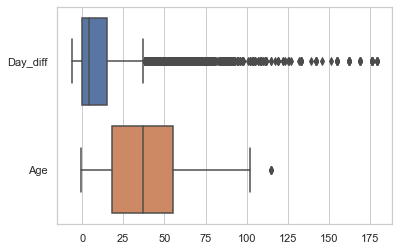

In [83]:
df,data, header_list,fn=read_table()



sg.theme('DarkAmber')
layout = [
                [sg.Text('\n\nDescription', key = '_text_', visible = True)],
                [
                sg.Button('show the dataset', key ='_1_'), 
                sg.Button('Show the stats', key = '_2_'), 
                sg.Button('boxplot', key = '_3_'),
                sg.Button('two boxplot', key = '_4_'),
                sg.Button('ScatterPlot', key = '_5_'),
                ],[sg.Text('\n\nScores', key = '_text_', visible = True)],[
                sg.Button('LogisticRegression score', key ='_6_'), 
                sg.Button('KNeighborsClassifier score', key = '_7_'),
                sg.Button('DecisionTreeClassifier score', key = '_8_')],[ 
                sg.Button('RandomForestClassifier score', key = '_9_'),
                sg.Button('AdaBoostClassifier', key = '_10_'),
                sg.Button('cross_val_score', key = '_11_'),
                ]]

window = sg.Window('Window', layout)
while True:            
    event, values = window.read()
    if event in (sg.WIN_CLOSED, '_exit_'):
        break

    elif '_1_' in event:
        show(dataset)
    elif '_2_' in event:
        show_stats(df)
    elif '_3_' in event:
        show1()
    elif '_4_' in event:
        show2()     
    elif '_5_' in event:
        show3()
    elif '_6_' in event:
        LR()
    elif '_7_' in event:
        KNC()
    elif '_8_' in event:
        DTC()
    elif '_9_' in event:
        RFC()     
    elif '_10_' in event:
        ABC()
    elif '_11_' in event:
        CVS()